# Гипотеза Коллатца - хаос в стакане.


Гипотеза Коллатца (3n+1 дилемма, сиракузская проблема) — одна из нерешённых проблем математики. Получила широкую известность благодаря простоте формулировки. Названа по имени немецкого математика Лотара Коллатца, сформулировавшего эту задачу 1 июля 1932 года.

## Формулировка

Для объяснения сути гипотезы рассмотрим следующую последовательность чисел, называемую сиракузской последовательностью. Берём любое натуральное число n. Если оно чётное, то делим его на 2, а если нечётное, то умножаем на 3 и прибавляем 1 (получаем 3n + 1). Над полученным числом выполняем те же самые действия, и так далее.

Гипотеза Коллатца заключается в том, что какое бы начальное число n мы ни взяли, рано или поздно мы получим единицу.

## Постановка задачи

Для объяснения сути гипотезы рассмотрим следующую последовательность чисел, называемую **сиракузской последовательностью**_. Берём любое натуральное число_n_. Если оно чётное, то делим его на 2, а если нечётное, то умножаем на 3 и прибавляем 1 (получаем 3_n_ + 1). Над полученным числом выполняем те же самые действия, и так далее.
Гипотеза Коллатца заключается в том, что какое бы начальное число _n_ мы ни взяли, рано или поздно мы получим единицу
(https://en.wikipedia.org/wiki/Collatz_conjecture)

Предложенная гипотеза может быть неверна при следующих условиях:
1. Начальное число K должно быть нечётным числом. Для чётных чисел гипотеза верна так как, согласно условию, в первом же шаге последовательности полученное число меньше исходного.
2. Существует некоторое начальное число K, которое порождает циклическую последовательность, исключающую число меньше K .
3. Существует некоторое начальное число К, которое порождает увеличивающуюся без ограничений, последовательность.


Исходя из вышеизложенных условий будут верны следующие утверждения:
1. Среднее последовательности чисел должно быть больше начального числа К и стремится к бесконечности.
2. Отношение длины последовательности чисел(количество шагов) к начальному числу К должно стремится к бесконечности. 

## Библиотеки

Загружу необходимый набор библиотек:

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Создание файла таблицы

Функция расчёта числовой последовательности

In [ ]:
def collatz(n):
    coll = [n]
    while n != 1:
        if n % 2 == 0:
            n /= 2
            coll.append(int(n))
        else:
            n = n * 3 + 1
            coll.append(int(n))
    return coll

Создам базу последовательности Коллатца, максимально возможную для моего компьютера, в 200 миллионов чисел. 

In [ ]:
a = []  # вывод в number
b = []  # вывод в max
c = []  # вывод в length
d = []  # вывод в sum

for i in range(1, 200000001):
    a.append(i)
    b.append(max(collatz(i)))
    c.append(len(collatz(i)) - 1)
    d.append(sum(collatz(i)))

In [ ]:
df = pd.DataFrame({'number': a, 'max_step': b, 'len_step': c, 'sum_step': d})

Запишу полученную таблицу в файл

In [ ]:
df.to_csv('D:/dataset/tr_200.csv')

## Чтение файла

Пропишу локаль:

In [4]:
LOCAL_DATA_PATH = 'D:/dataset'

Прочту файл:

In [5]:
DATA_FILE_1 = 'tr_200.csv'

In [9]:
df = pd.read_csv(f'{LOCAL_DATA_PATH}/{DATA_FILE_1}', index_col=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000000 entries, 0 to 199999999
Data columns (total 4 columns):
 #   Column    Dtype
---  ------    -----
 0   number    int64
 1   max_step  int64
 2   len_step  int64
 3   sum_step  int64
dtypes: int64(4)
memory usage: 7.5 GB


In [11]:
df.head()

,number,max_step,len_step,sum_step
0,1,1,0,1
1,2,2,1,3
2,3,16,7,49
3,4,4,2,7
4,5,16,5,36


Столбцы таблицы:
<br>number - число,
<br>max_step - максимальное число в последовательности для числа n,
<br>len_step - количество шагов, длина последовательности для числа n,
<br>sum_step - сумма чисел в последовательности для числа n.

## Подготовка таблицы

Посчитаю среднее в последовательности для каждого числа n:

In [11]:
df['mean_step'] = (df['sum_step'] / df['len_step']).round(1)

Заменю inf на 0

In [13]:
df.replace([np.inf], 0, inplace=True)

Посчитаю разницу 'dif_mean_number' между средним последовательности 'mean_step' и начальным числом 'number:

In [15]:
df['dif_mean_number'] = (df['mean_step'] / df['number']).round(1)

Найду отношение количества шагов len_step к начальному числу number:

In [16]:
df['len_number'] = df['len_step'] / df['number'].round(3)

Сгруппирую данные по количеству шагов len_step с целью нахождения частоты повторений шагов - repetition_rate_step:

In [17]:
df_group = df.groupby('len_step', as_index=False).agg(
    repetition_rate_step=('number', 'count')
)

In [18]:
table_research_200 = pd.merge(df, df_group, how='left', on='len_step')

Создам столбец с категориальными признаками, разделяющих таблицу на равные 100 частей:

In [22]:
label=[]
for i in range(20):
    label.append(i)

In [23]:
table_research_200['n_base'] = pd.qcut(df['number'], q=20, labels=label)

In [25]:
table_research_200.head()

,number,max_step,len_step,sum_step,mean_step,dif_mean_number,len_number,repetition_rate_step,n_base
162663028,162663029,28523833504,255,193918218893,760463603.5,4.7,0.000002,1148171,16
121560416,121560417,461549716,146,5587672535,38271729.7,0.3,0.000001,1456035,12
51791835,51791836,124440784,199,1074183870,5397908.9,0.1,0.000004,564968,5
85748173,85748174,3129050248,174,31122622896,178865648.8,2.1,0.000002,1087558,8
90860715,90860716,102218308,143,1066447926,7457677.8,0.1,0.000002,1100690,9
143296876,143296877,429890632,167,4863121551,29120488.3,0.2,0.000001,1821412,14
125528766,125528767,2859702244,164,37911429774,231167254.7,1.8,0.000001,1370909,12
165588101,165588102,372573232,224,1862575815,8315070.6,0.1,0.000001,1681233,16
159023419,159023420,402528040,423,6431724250,15205021.9,0.1,0.000003,30487,15
63403333,63403334,142657504,176,1068162643,6069105.9,0.1,0.000003,726054,6


## Базы к исследованию:

In [30]:
# number=1000
number_thousand = table_research_200[table_research_200['number'] < 1001]

# number=1000_000
number_million = table_research_200[table_research_200['number'] < 1000001]

# number = 10_000_000
number_ten_millions = table_research_200[table_research_200['number'] < 10000001]

# number = 100_000_000
number_hundred_million = table_research_200[table_research_200['number'] < 100000001]


## Гистограммы:

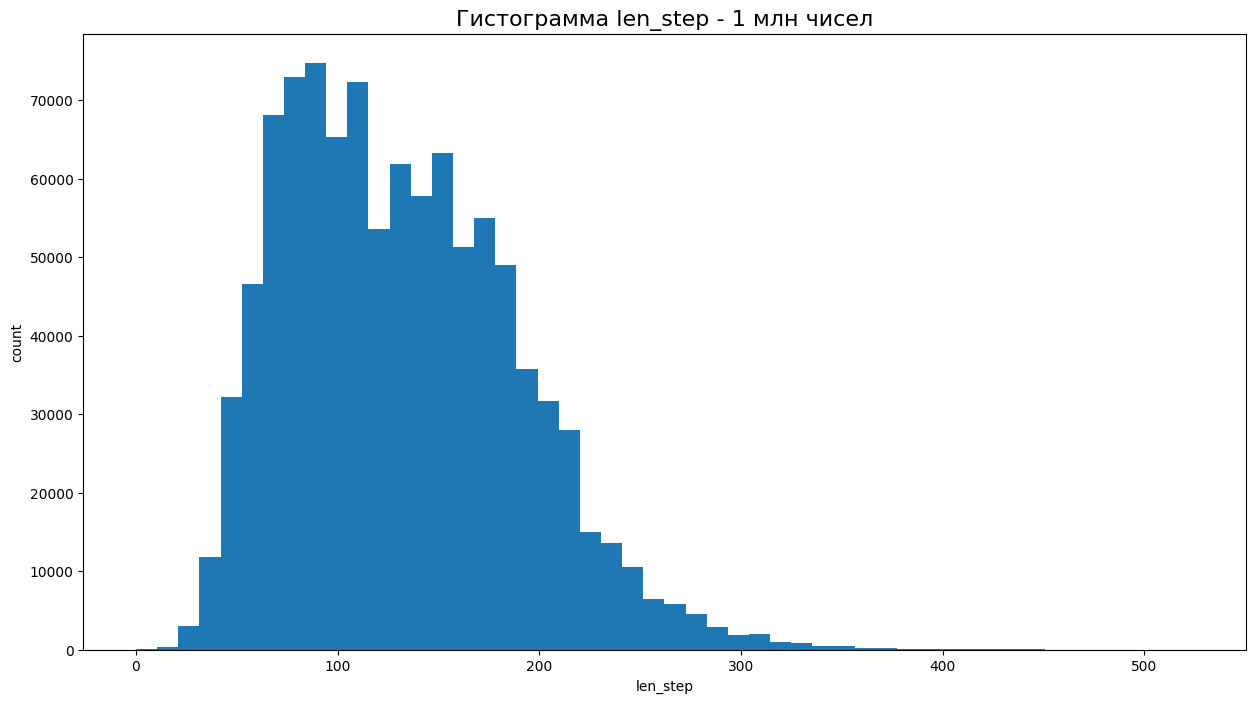

In [31]:
fig, ax = plt.subplots(figsize=(15,8))

ax.hist(number_million['len_step'], bins=50)

ax.set_xlabel('len_step')
ax.set_ylabel('count')

plt.title('Гистограмма len_step - 1 млн чисел', fontsize=16)

plt.show()

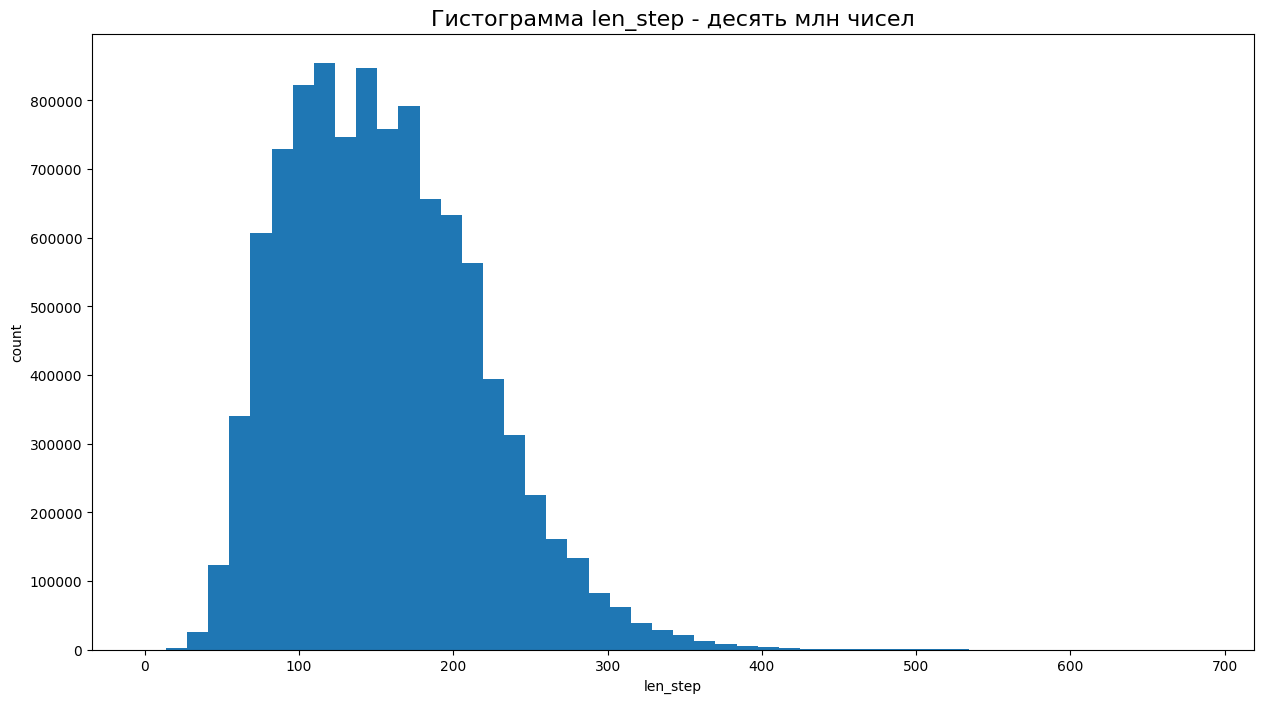

In [32]:
fig, ax = plt.subplots(figsize=(15,8))

ax.hist(number_ten_millions['len_step'], bins=50)

ax.set_xlabel('len_step')
ax.set_ylabel('count')

plt.title('Гистограмма len_step - десять млн чисел', fontsize=16)

plt.show()

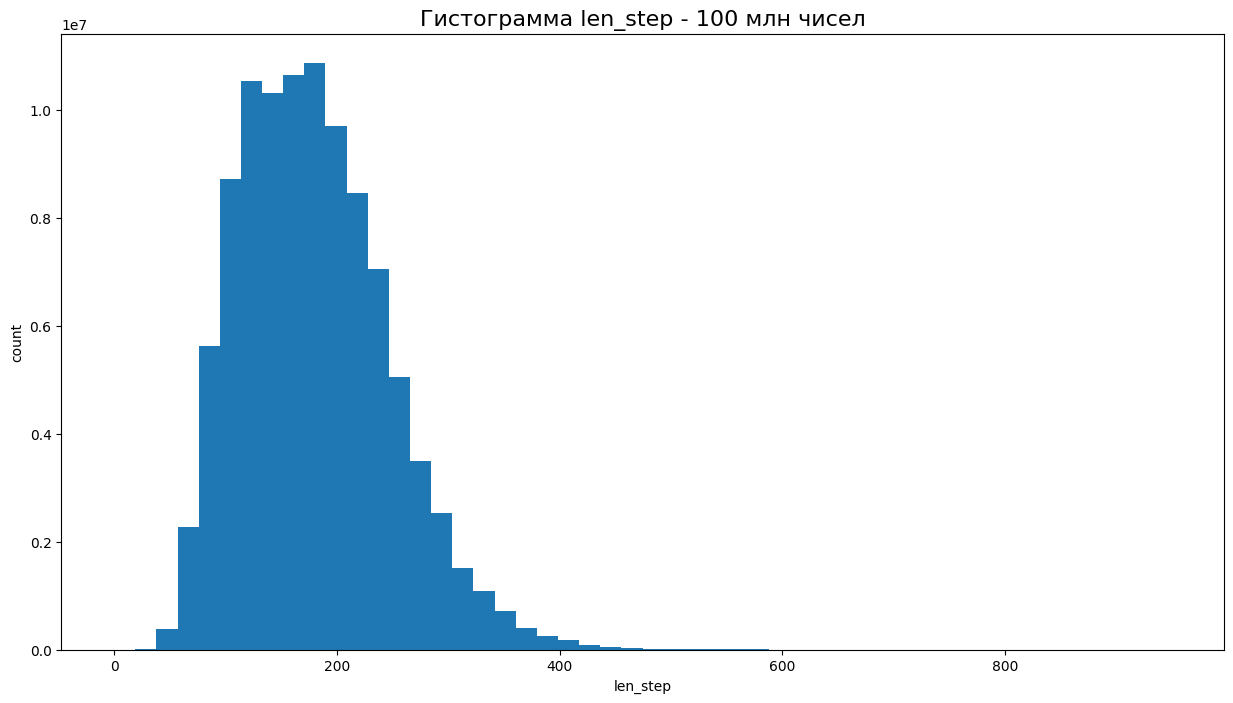

In [33]:
fig, ax = plt.subplots(figsize=(15,8))

ax.hist(number_hundred_million['len_step'], bins=50)

ax.set_xlabel('len_step')
ax.set_ylabel('count')

plt.title('Гистограмма len_step - 100 млн чисел', fontsize=16)

plt.show()

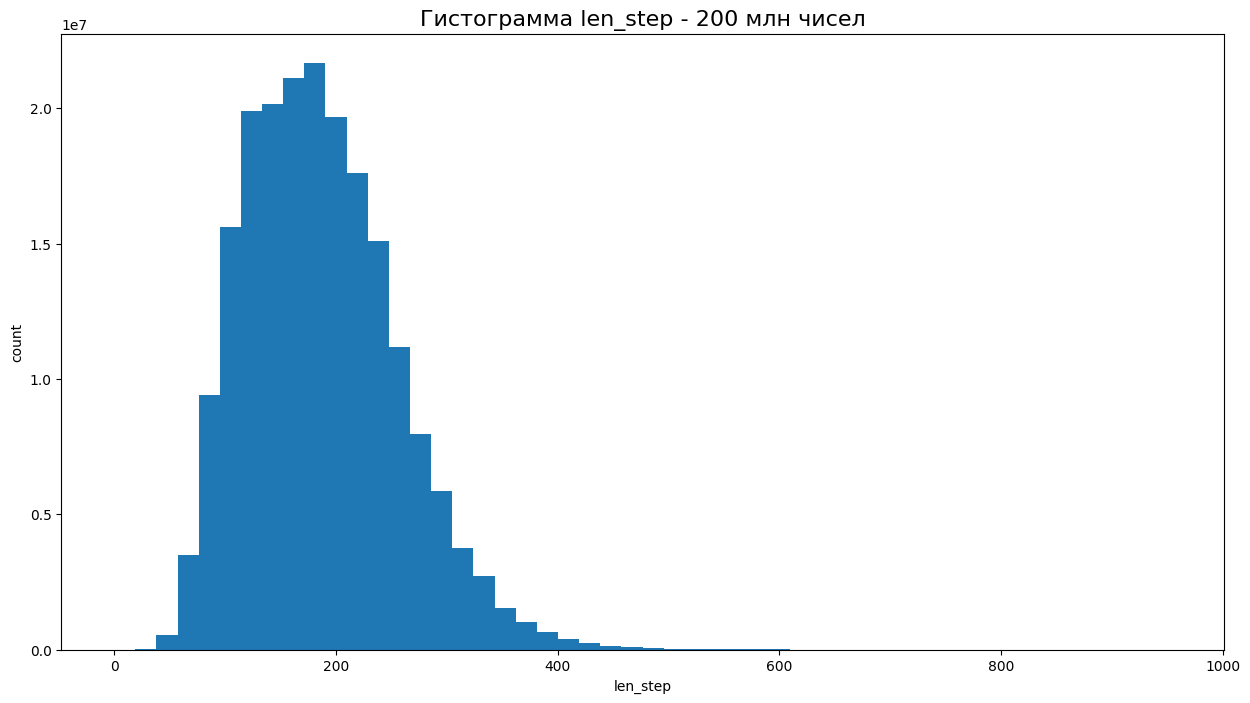

In [34]:
fig, ax = plt.subplots(figsize=(15,8))

ax.hist(table_research_200['len_step'], bins=50)

ax.set_xlabel('len_step')
ax.set_ylabel('count')

plt.title('Гистограмма len_step - 200 млн чисел', fontsize=16)

plt.show()

## Графики

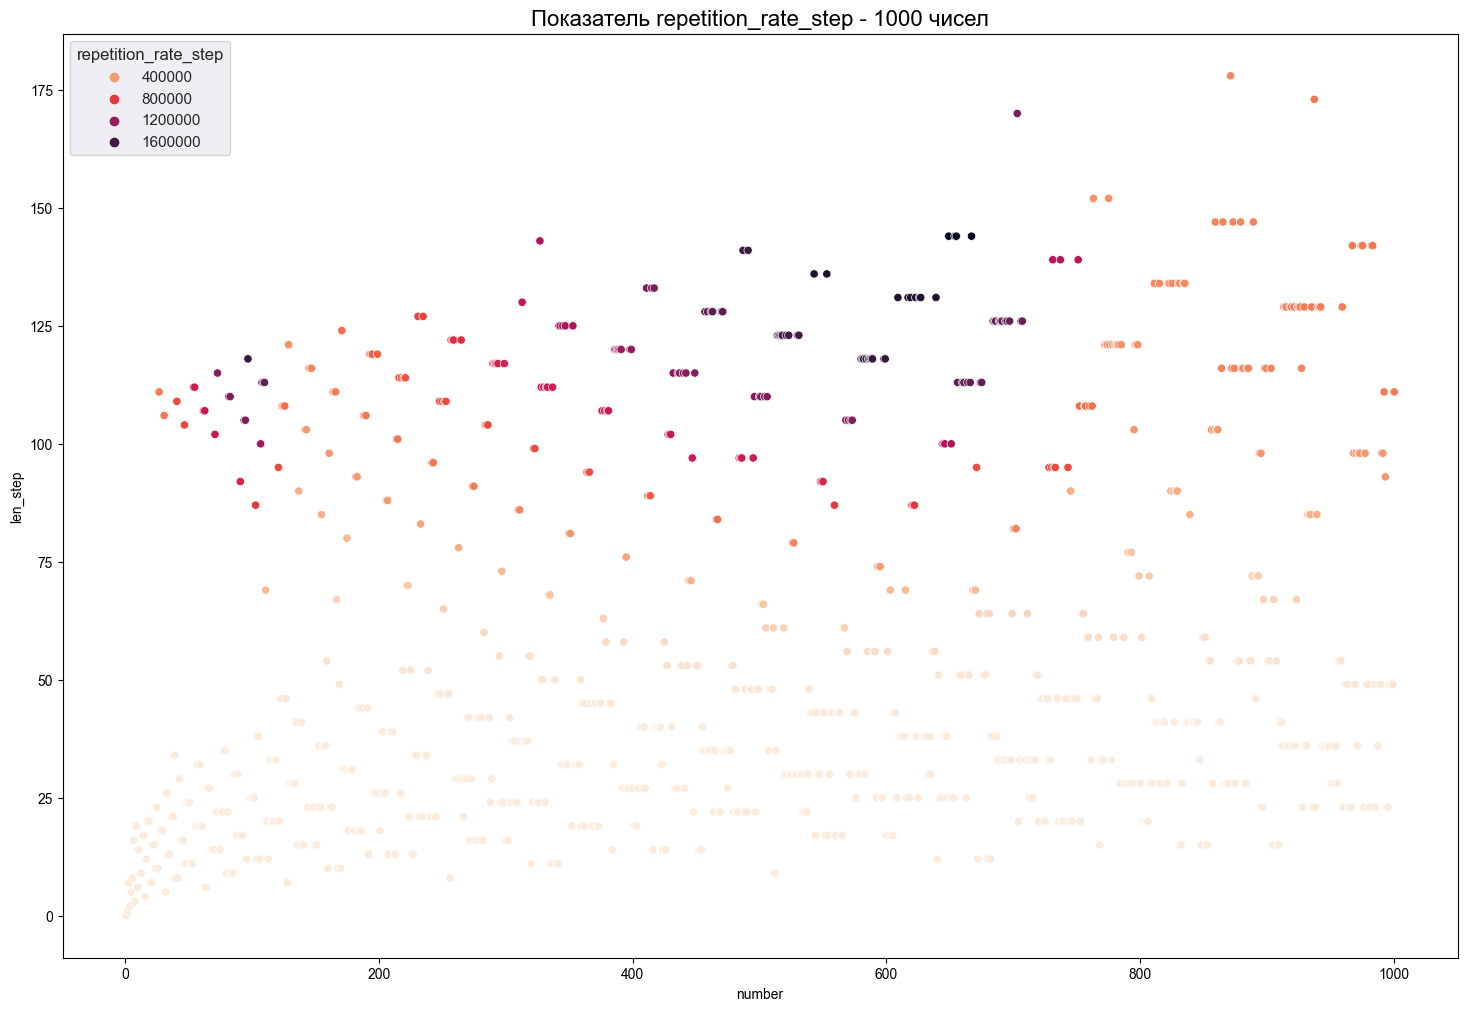

In [35]:
f, ax = plt.subplots(figsize=(18, 12))

sns.set_theme(style='dark')

sns.scatterplot(
    data=number_thousand,
    x='number',
    y='len_step',
    hue='repetition_rate_step',
    palette='rocket_r',
    marker = 'o'
    )

sns.move_legend(ax, "upper left")

plt.xlabel('number')
plt.ylabel('len_step')

plt.title('Показатель repetition_rate_step - 1000 чисел', fontsize=16)

plt.show()

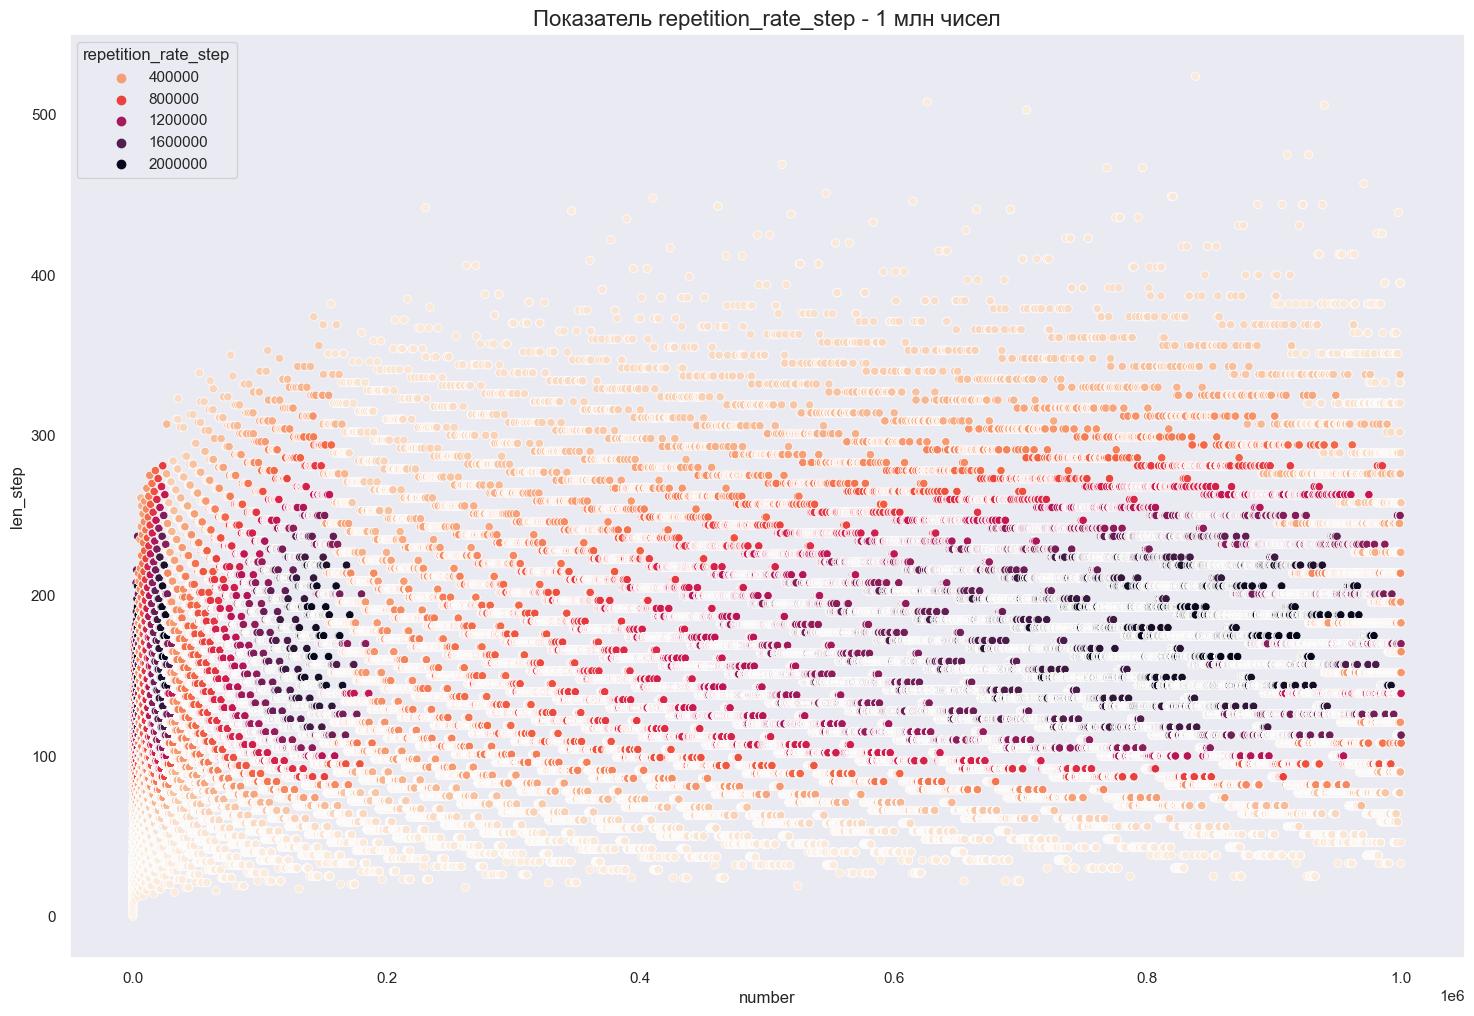

In [36]:
f, ax = plt.subplots(figsize=(18, 12))

sns.set_theme(style='dark')

sns.scatterplot(
    data=number_million,
    x='number',
    y='len_step',
    hue='repetition_rate_step',
    palette='rocket_r',
    marker = 'o'
    )

sns.move_legend(ax, "upper left")

plt.xlabel('number')
plt.ylabel('len_step')

plt.title('Показатель repetition_rate_step - 1 млн чисел', fontsize=16)

plt.show()

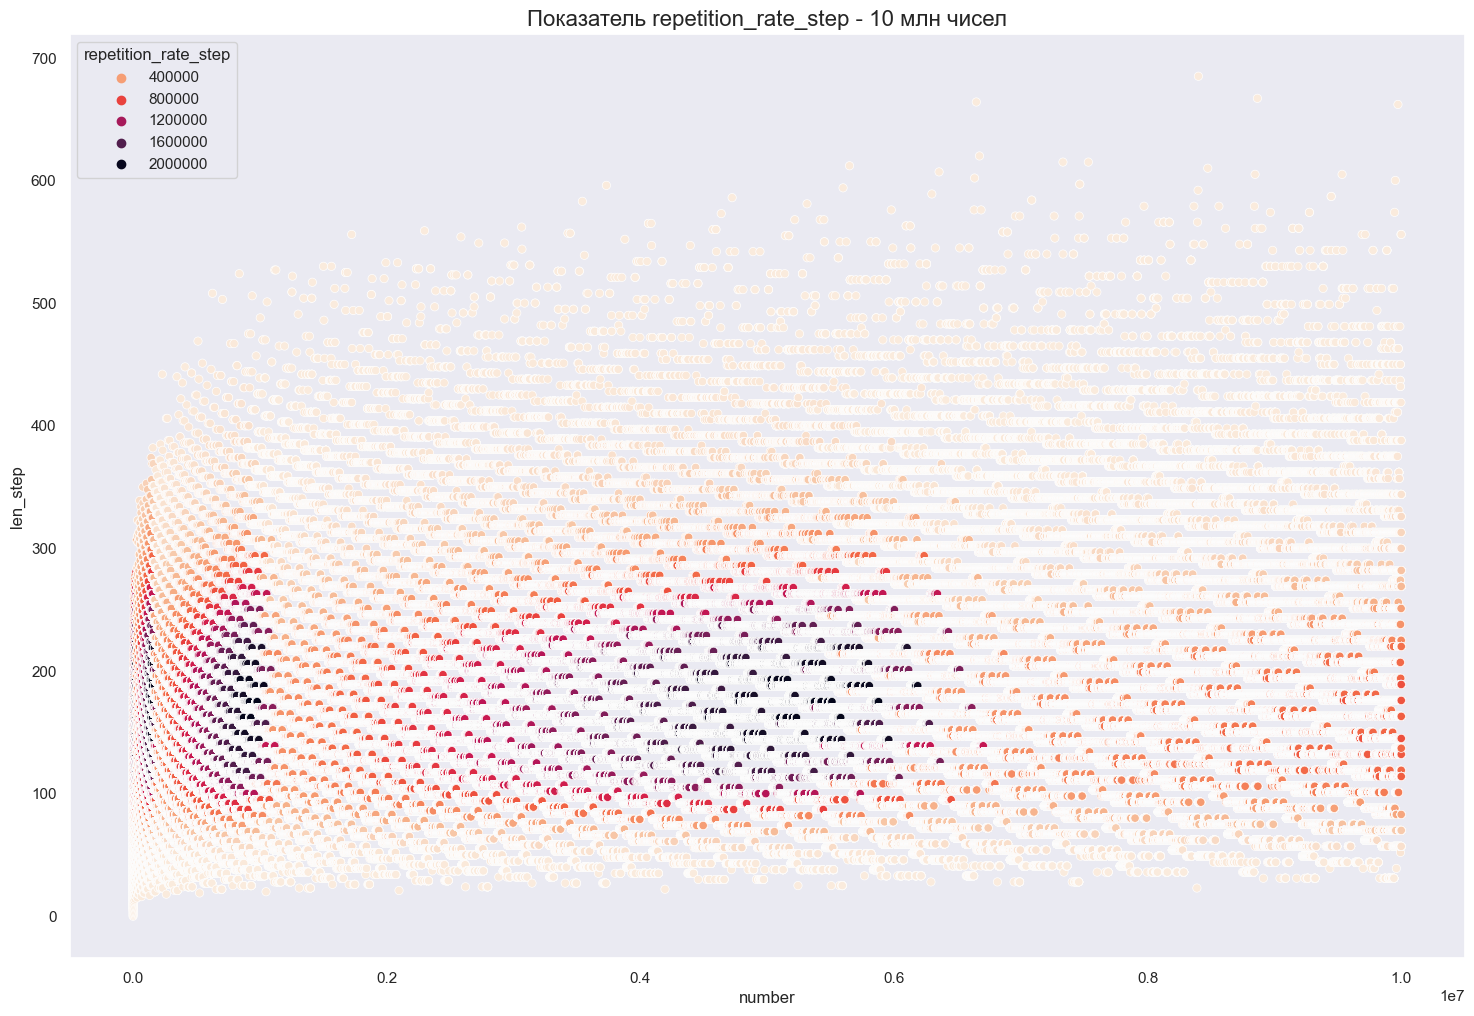

In [37]:
f, ax = plt.subplots(figsize=(18, 12))

sns.set_theme(style='dark')

sns.scatterplot(
    data=number_ten_millions,
    x='number',
    y='len_step',
    hue='repetition_rate_step',
    palette='rocket_r',
    marker = 'o'
    )

sns.move_legend(ax, "upper left")

plt.xlabel('number')
plt.ylabel('len_step')

plt.title('Показатель repetition_rate_step - 10 млн чисел', fontsize=16)

plt.show()

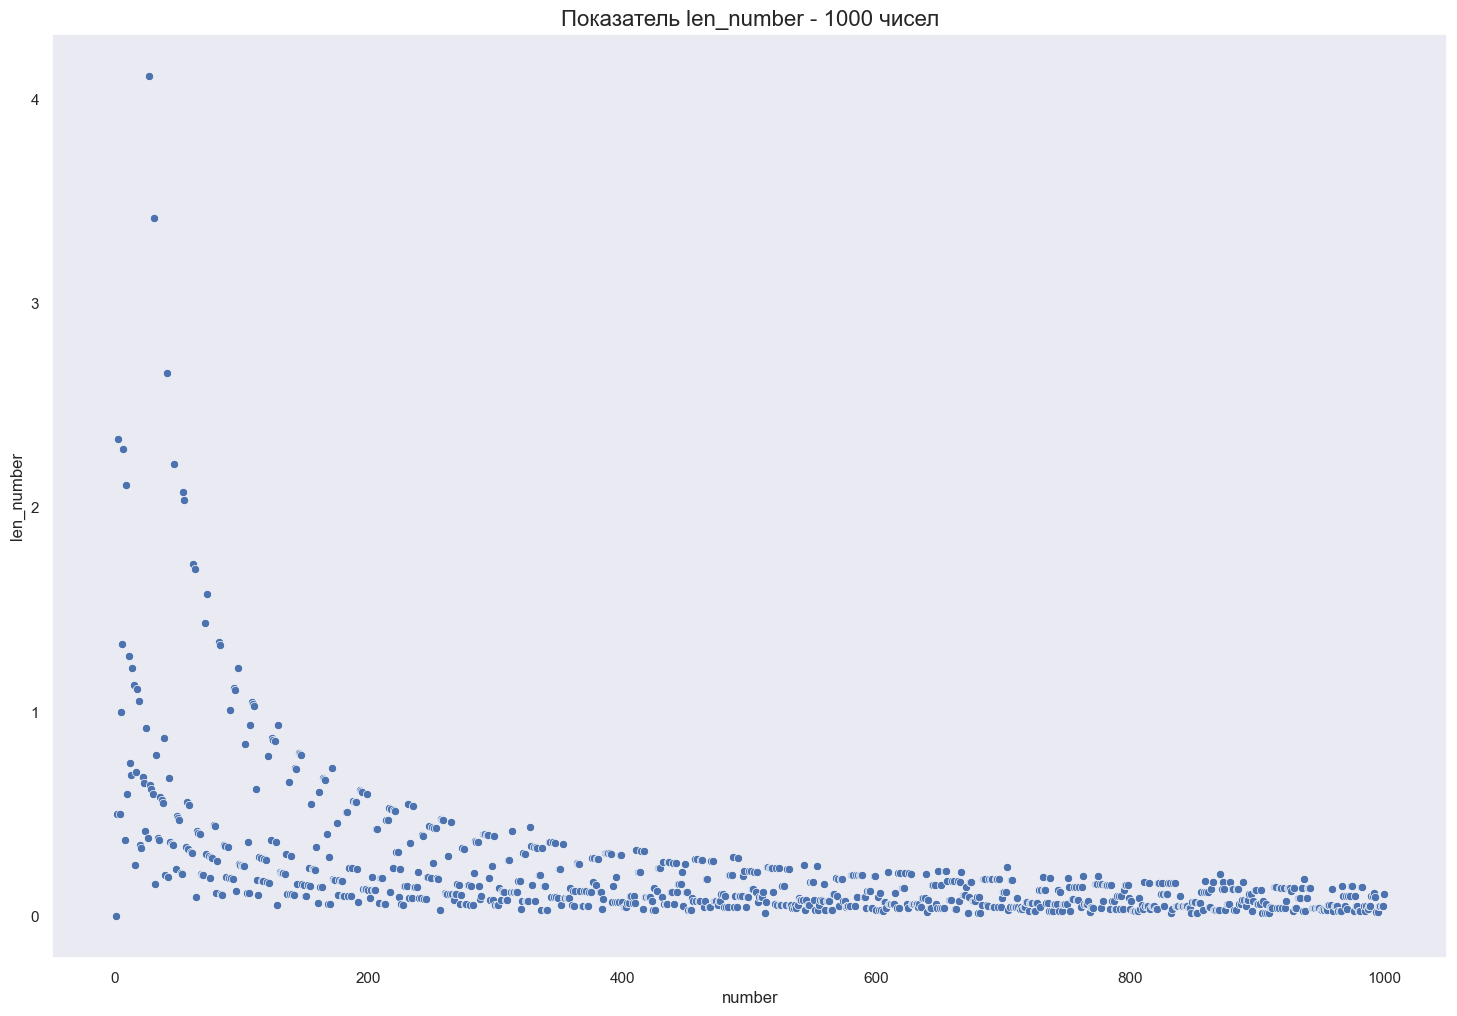

In [38]:
f, ax = plt.subplots(figsize=(18, 12))

sns.set_theme(style='dark')

sns.scatterplot(
    data=number_thousand,
    x='number',
    y='len_number',
    marker = 'o')

plt.xlabel('number')
plt.ylabel('len_number')

plt.title('Показатель len_number - 1000 чисел', fontsize=16)

plt.show()

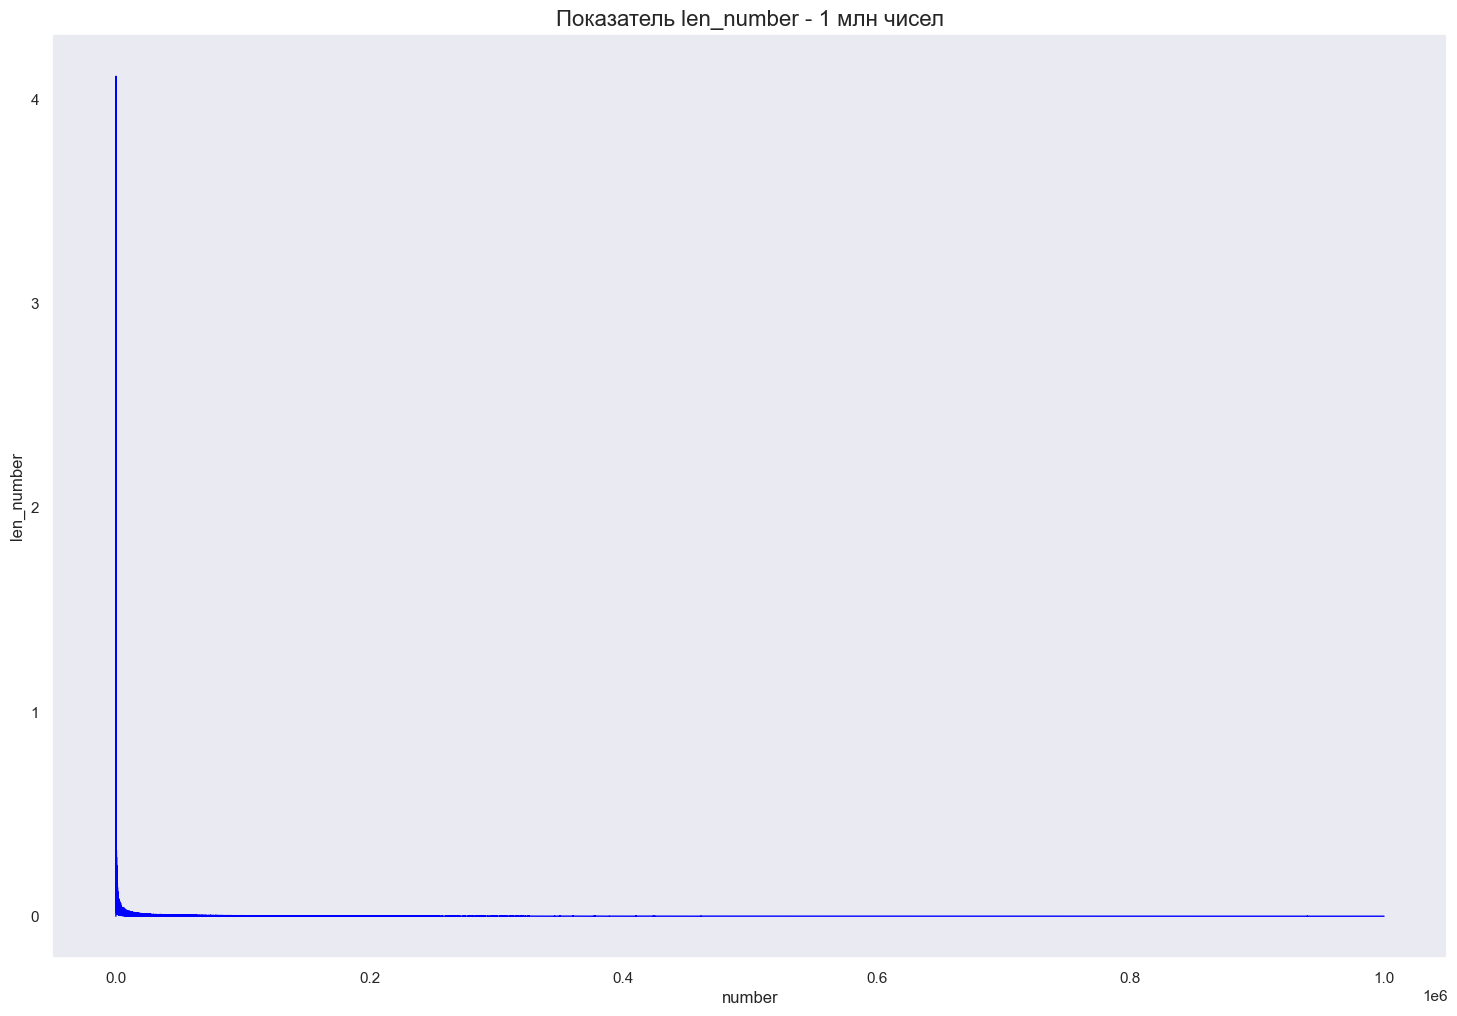

In [39]:
f, ax = plt.subplots(figsize=(18, 12))

sns.set_theme(style='dark')

sns.lineplot(
    data=number_million,
    x='number',
    y='len_number',
    color='blue',
    linewidth = 1)

plt.xlabel('number')
plt.ylabel('len_number')

plt.title('Показатель len_number - 1 млн чисел', fontsize=16)

plt.show()

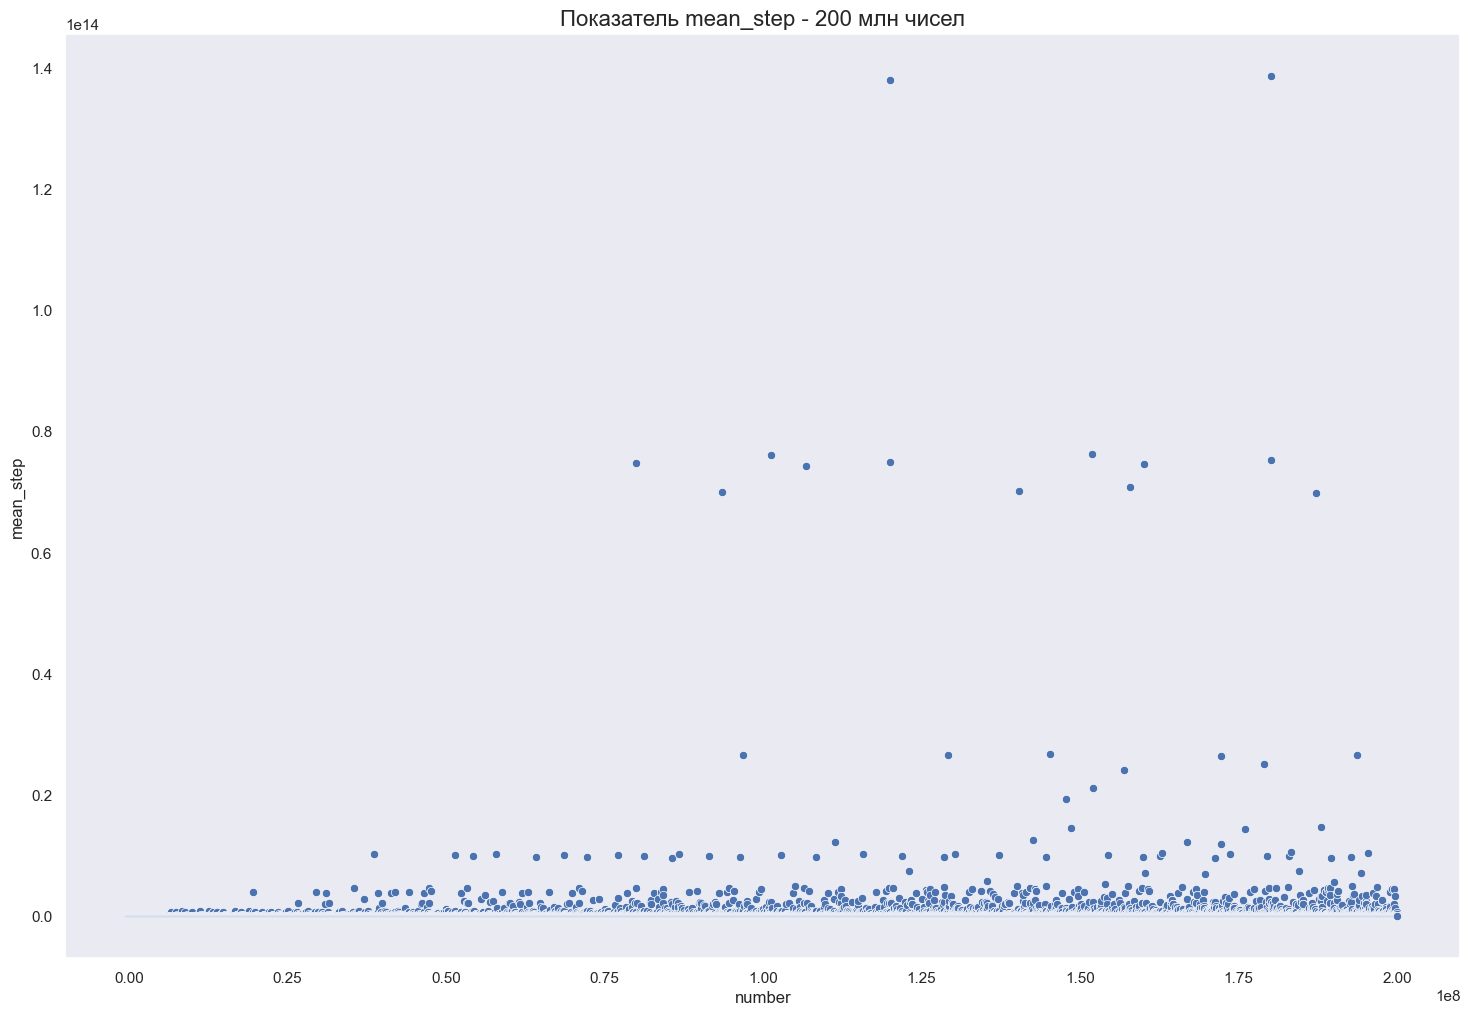

In [40]:
f, ax = plt.subplots(figsize=(18, 12))

sns.set_theme(style='dark')

sns.scatterplot(
    data=df,
    x='number',
    y='mean_step',
    marker = 'o')

plt.xlabel('number')
plt.ylabel('mean_step')

plt.title('Показатель mean_step - 200 млн чисел', fontsize=16)

plt.show()

## Статистические показатели


In [41]:
table_research_200['dif_mean_number'].describe()

count    2.000000e+08
mean     9.497836e-01
std      1.999961e+02
min      0.000000e+00
25%      1.000000e-01
50%      1.000000e-01
75%      3.000000e-01
max      1.149695e+06
Name: dif_mean_number, dtype: float64

In [42]:
table_research_200[table_research_200['dif_mean_number'] >= 900000]

,number,max_step,len_step,sum_step,mean_step,dif_mean_number,len_number
80049390,80049391,2185143829170100,572,42766471114787078,7.476656e+13,934005.3,0.000007
120080894,120080895,3277901576118580,438,60468685271082402,1.380564e+14,1149694.6,0.000004


In [43]:
table_research_200.sort_values(by='mean_step', ascending=False).head()

,number,max_step,len_step,sum_step,mean_step,dif_mean_number,len_number,repetition_rate_step,n_base
180121342,180121343,3277901576118580,436,60468684790758821,1.386896e+14,769979.0,0.000002,23705,18
120080894,120080895,3277901576118580,438,60468685271082402,1.380564e+14,1149694.6,0.000004,12553,12
151968766,151968767,2185143829170100,560,42766315155695355,7.636842e+13,502527.1,0.000004,973,15
101312510,101312511,2185143829170100,562,42766315560945400,7.609665e+13,751108.1,0.000006,511,10
180111130,180111131,2185143829170100,568,42766470314293164,7.529308e+13,418036.8,0.000003,965,18


## Зависимости

In [44]:
df['len_step'].corr(df['number'])

0.13341130769201975

In [45]:
df['mean_step'].corr(df['number'])

0.002163171118205873

In [46]:
df['len_number'].corr(df['number'])

-0.014387073239076113

In [47]:
df_group = table_research_200.groupby('n_base', as_index=False).agg(
    mean_base_step=('len_step', 'mean'),
    min_base_step=('len_step', 'min'),
    max_base_step=('len_step', 'max'))

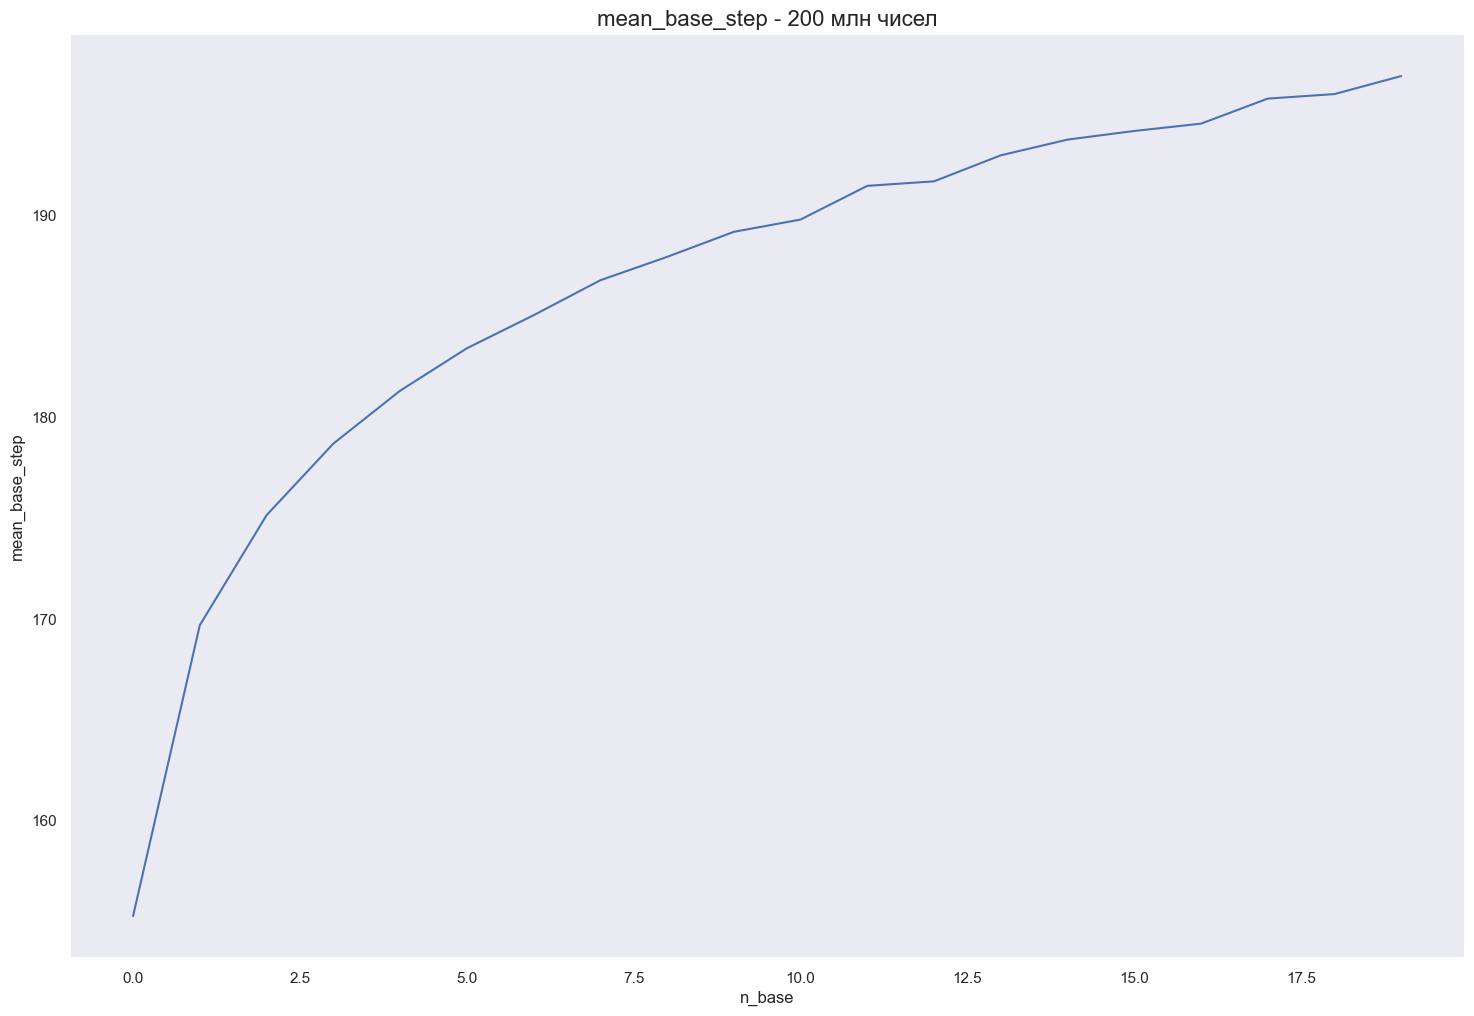

In [48]:
f, ax = plt.subplots(figsize=(18, 12))

sns.set_theme(style='dark')

sns.lineplot(
    data=df_group,
    x='n_base',
    y='mean_base_step')

plt.xlabel('n_base')
plt.ylabel('mean_base_step')

plt.title('mean_base_step - 200 млн чисел', fontsize=16)

plt.show()